# Complete Regression - Lab

## Introduction
By now, you have created all the necessary functions to calculate the slope, intercept, best-fit line, prediction and visualizations. In this lab you will put them all together to run a regression experiment and calculate the model loss. 

## Objectives

You will be able to:

* Run a complete regression analysis using python

## The formulas

**Slope**: 
$\hat m = \dfrac{\overline{x}*\overline{y}-\overline{xy}}{(\overline{x})^2-\overline{x^2}}$


**Intercept**: $ \hat c = \bar{y} - \hat m\bar{x}$

**Prediction**: $\hat{y} = \hat mx + \hat c$

**R-Squared**: 
$ R^2 = 1- \dfrac{SS_{RES}}{SS_{TOT}} = 1 - \dfrac{\sum_i(y_i - \hat y_i)^2}{\sum_i(y_i - \overline y_i)^2} $


Use the python functions created earlier to implement these formulas to run a regression analysis using x and y as input variables. 

In [27]:
# Combine all the functions created so far to run a complete regression experiment. 
# Produce an output similar to the one shown below. 
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

X = np.array([1,2,3,4,5,6,7,8,9,10], dtype=np.float64)
Y = np.array([7,7,8,9,9,10,10,11,11,12], dtype=np.float64)
# calculate

In [20]:
def calc_slope(xs,ys):
    slope = (np.mean(xs) * np.mean(ys) - np.mean(xs*ys)) / (np.mean(xs)**2 - (np.mean(xs**2)))
    return slope

def best_fit(xs,ys):
    b1 = calc_slope(xs, ys)
    b0 = np.mean(ys) - b1*np.mean(xs)
    return round(b1,2), round(b0,2)

def reg_line (m, c, xs):
    reg_line = [(c + (m * x)) for x in xs]
    return reg_line

def sq_err(Y, Y_pred):
    """
    input
    y_a : true y values
    y_b : regression line
    
    return
    squared error between regression and true line (ss_tot)
    """
    y_y_pred = list(zip(Y, Y_pred))
    ss_error = [(y - y_pred)**2 for y, y_pred in y_y_pred]
    return np.sum(ss_error)

def r_squared(y_real, y_predicted):
    """
    input
    y_real: real values
    y_predicted: regression values
    
    return
    r_squared value
    """
    SSE = sq_err(y_real, y_predicted)
    SST = sq_err(y_real, np.full(len(y_real), np.mean(y_real)))
    return round(1 - (SSE/SST),2)

Basic Regression Diagnostics
----------------------------
Slope: 0.56
Y-Intercept: 6.33
R-Squared: 0.97
----------------------------
Model: Y = 0.56 * X + 6.33


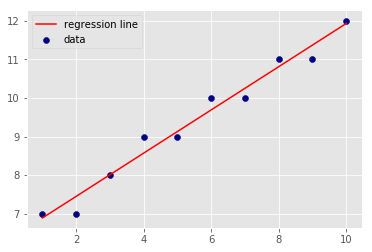

In [31]:
def reg_diagnostics(X, Y):
    slope, y_int = best_fit(X, Y)
    y_pred = reg_line(slope, y_int, X)
    r_square = r_squared(Y, y_pred)

    print(f"Basic Regression Diagnostics")
    print(f"----------------------------")
    print(f"Slope: {slope}")
    print(f"Y-Intercept: {y_int}")
    print(f"R-Squared: {r_square}")
    print(f"----------------------------")
    print(f"Model: Y = {slope} * X + {y_int}")
    
    plt.scatter(X, Y, color='navy', label='data')
    plt.plot(X, y_pred, color='red', label='regression line')
    plt.legend()
    plt.show();
    
reg_diagnostics(X,Y)

Basic Regression Diagnostics
----------------------------
Slope: 0.56
Y-Intercept: 6.33
R-Squared: 0.97
----------------------------
Model: Y = 0.56 * X + 6.33


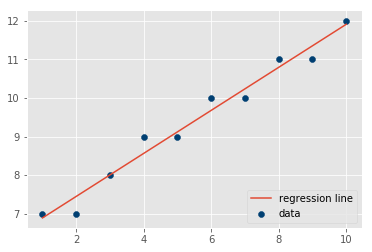

In [70]:
# Basic Regression Diagnostics
# ----------------------------
# Slope: 0.56
# Y-Intercept: 6.33
# R-Squared: 0.97
# ----------------------------
# Model: Y = 0.56 * X + 6.33

## Make Predictions

Predict and plot the value of y using regression line above for a new value of $x = 4.5$.

Basic Regression Diagnostics
----------------------------
Slope: 0.56
Y-Intercept: 6.33
R-Squared: 0.97
----------------------------
Model: Y = 0.56 * X + 6.33


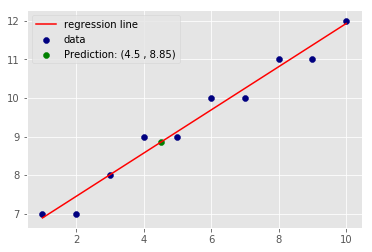

In [41]:
def reg_diagnostics(X, Y, new_X):
    slope, y_int = best_fit(X, Y)
    y_pred = reg_line(slope, y_int, X)
    r_square = r_squared(Y, y_pred)
    new_Y = new_X*slope + y_int

    print(f"Basic Regression Diagnostics")
    print(f"----------------------------")
    print(f"Slope: {slope}")
    print(f"Y-Intercept: {y_int}")
    print(f"R-Squared: {r_square}")
    print(f"----------------------------")
    print(f"Model: Y = {slope} * X + {y_int}")
    
    plt.scatter(X, Y, color='navy', label='data')
    plt.plot(X, y_pred, color='red', label='regression line')
    plt.scatter(new_X, new_Y, color='green', label=f"Prediction: ({new_X} , {round(new_Y,2)})")
    plt.legend()
    plt.show();
    
reg_diagnostics(X,Y, 4.5)

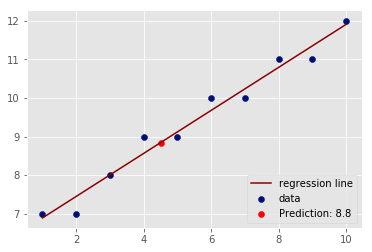

In [66]:
# Make prediction for x = 4.5 and visualize on the scatter plot

## Level up - Optional 
Load the "`heightweight.csv`" dataset. Use the height as an independent and weight as a dependent variable and draw a regression line to data using your code above. Calculate your R-Squared value for the model and try to predict new values of y. 

## Summary

In this lab, we ran a complete simple regression analysis experiment using functions created so far. Next up, you'll learn how you can use python's built-in modules to perform similar analyses with a much higher level of sophistication. 